<a href="https://www.kaggle.com/code/aleksandrmorozov123/natural-language-processing?scriptVersionId=96738758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


**Natural Language Processing - step by step**

In [2]:
# import required libraries
import numpy as np
import json
import pandas as pd

In [3]:
# read the data
df = pd.read_csv ('../input/twitter-sentiment-analysis-hatred-speech/test.csv')
df.head (5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


**Lowercase**

In [4]:
df['tweet'] = df['tweet'].apply (lambda x: " ".join (x.lower () for x in x.split ()))
df['tweet']

0        #studiolife #aislife #requires #passion #dedic...
1        @user #white #supremacists want everyone to se...
2        safe ways to heal your #acne!! #altwaystoheal ...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download! #shoegaze #ne...
Name: tweet, Length: 17197, dtype: object

**Remove punctuation**

In [5]:
df ['tweet'] = df['tweet'].str.replace (r"""[^\w\s]+""","")

df['tweet']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone to see t...
2        safe ways to heal your acne altwaystoheal heal...
3        is the hp and the cursed child book up for res...
4        3rd bihday to my amazing hilarious nephew eli ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like a mermaid ð hairflip neverready f...
17194    hillary campaigned today in ohioomg amp used w...
17195    happy at work conference right mindset leads t...
17196    my song so glad free download shoegaze newmusi...
Name: tweet, Length: 17197, dtype: object

**Removing stop words**

In [6]:
import nltk
from nltk.corpus import stopwords

# remove stop words
stop = stopwords.words ('english')
df['tweet'] = df['tweet'].apply (lambda x: " ".join (x for x in x.split () if x not in stop))
df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone see new ...
2        safe ways heal acne altwaystoheal healthy healing
3        hp cursed child book reservations already yes ...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

**Tokenizing step**

In [7]:
from textblob import TextBlob
TextBlob (df['tweet'][3]).words

WordList(['hp', 'cursed', 'child', 'book', 'reservations', 'already', 'yes', 'ððð', 'harrypotter', 'pottermore', 'favorite'])

**Stemming**

In [8]:
from nltk.stem import PorterStemmer
st = PorterStemmer ()
df['tweet'][:5].apply (lambda x: " ".join ([st.stem(word) for word in x.split ()]))

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon see new â ...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye ððð harry...
4    3rd bihday amaz hilari nephew eli ahmir uncl d...
Name: tweet, dtype: object

**Lemmatizing**

In [9]:
from textblob import Word

df['tweet'] = df['tweet'].apply (lambda x: " ".join ([Word(word).
                                                     lemmatize () for word in x.split ()]))

df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacist want everyone see new â...
2         safe way heal acne altwaystoheal healthy healing
3        hp cursed child book reservation already yes ð...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset lead cultu...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

**Exploring text data**

In [10]:
# import required libraries

import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

# computer the frequency of all words
frequency_dist = nltk.FreqDist (df['tweet'][:30])
frequency_dist

FreqDist({'studiolife aislife requires passion dedication willpower find newmaterialsâ': 1, 'user white supremacist want everyone see new â birdsâ movie â hereâs': 1, 'safe way heal acne altwaystoheal healthy healing': 1, 'hp cursed child book reservation already yes ððð harrypotter pottermore favorite': 1, '3rd bihday amazing hilarious nephew eli ahmir uncle dave love missesâ': 1, 'choose momtips': 1, 'something inside dy ððâ eye ness smokeyeyes tired lonely sof grungeâ': 1, 'finishedtattooinkedinkloveitâï âïâïâïâï thanksaleeee': 1, 'user user user never understand dad left young deep inthefeels': 1, 'delicious food lovelife capetown mannaepicure resturantâ': 1, ...})

In [11]:
sorted_frequency_dist = sorted (frequency_dist, key = frequency_dist.__getitem__, reverse = True)
sorted_frequency_dist

['studiolife aislife requires passion dedication willpower find newmaterialsâ',
 'user white supremacist want everyone see new â birdsâ movie â hereâs',
 'safe way heal acne altwaystoheal healthy healing',
 'hp cursed child book reservation already yes ððð harrypotter pottermore favorite',
 '3rd bihday amazing hilarious nephew eli ahmir uncle dave love missesâ',
 'choose momtips',
 'something inside dy ððâ eye ness smokeyeyes tired lonely sof grungeâ',
 'finishedtattooinkedinkloveitâï âïâïâïâï thanksaleeee',
 'user user user never understand dad left young deep inthefeels',
 'delicious food lovelife capetown mannaepicure resturantâ',
 '1000dayswasted narcosis infinite ep make aware grinding neuro bass lifestyle',
 'one world greatest spoing event lemans24 teamaudi',
 'half way website allgoingwell',
 'good food good life enjoy ðððððð called garlic bread iloveitâ',
 'ill stand behind guncontrolplease senselessshootings taketheguns comicrelief stillsad',
 'atei ate ateðð jamaisasthi fish

**Consider words with lengh greater than 5 and plot**

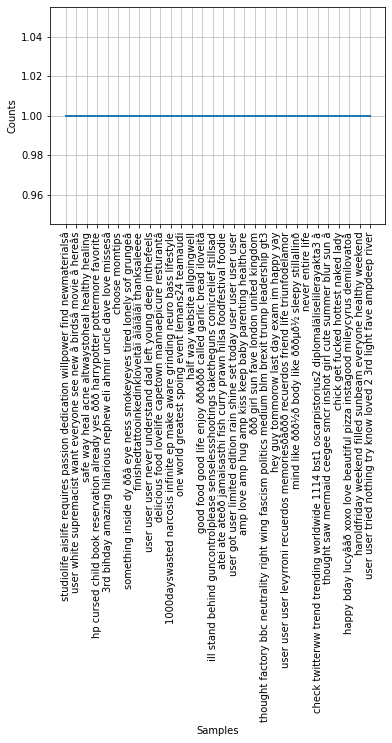

In [12]:
large_words = dict ([(k, v) for k, v in frequency_dist.items () if len (k) > 5])
frequency_dist = nltk.FreqDist (large_words)
frequency_dist.plot (50, cumulative = False)

**Build wordcloud**

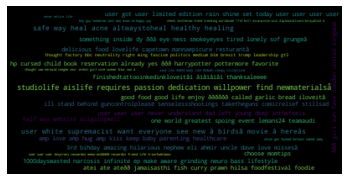

In [13]:
from wordcloud import WordCloud
tcloud = WordCloud ().generate_from_frequencies (frequency_dist)

# plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow (tcloud, interpolation = 'bilinear')
plt.axis ("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show ()

**Building a text preprocessing pipeline**

In [14]:
# read the data

datatweet = pd.read_csv ('../input/twitter-sentiment-analysis-hatred-speech/test.csv')
dtweet = datatweet ['tweet'][:30]

In [15]:
# write the function to process the tweets
def processRow (row):
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    dtweet = row
    
    #lower case
    dtweet = dtweet.apply (lambda x: " ".join (x.lower () for x in x.split ()))
    
    #Removes unicode strings like "\u002c" and "x96"
    dtweet = dtweet.str.replace (r"""(\\u[0-9A-Fa-f]+)""","")
    dtweet = dtweet.str.replace (r"""[^\x00-\x7f]""","")
    
    # convert any url to URL
    dtweet = dtweet.str.replace("""(www\.[^\s]+)|(htpps?://[^\s]+)""", 'URL')
    
    # convert any @Username to "AT_USER"
    dtweet = dtweet.str.replace ("""@[^\s]+""", 'AT_USER')
    
    # remove additional white spaces
    dtweet = dtweet.str.replace ("""[\s]+""", ' ') 
    dtweet = dtweet.str.replace ("""[\n]+""", ' ')
    
    # remove not alphanumeric symbols white spaces
    dtweet = dtweet.str.replace (r"""[^\w]""", ' ')
    
    # remove hashtag in front of a word """
    dtweet = dtweet.str.replace (r"""#([^\s]+)""", r"""\1""")
    
    # replace #word with word
    dtweet = dtweet.str.replace (r"""#([^\s]+)""", r"""\1""")
    
    # remove :( or :)
    dtweet = dtweet.replace (""":)",""")
    dtweet = dtweet.replace (""":(",""")
    
    #remove numbers
    dtweet = " ".join([i for i in dtweet if not i.isdigit ()])
    
    # remove multiple exclamation
    dtweet = re.sub (r"""(\!)\1+""", ' ', dtweet)
    
    # remove multiple question marks
    dtweet = re.sub (r"""(\?)\1+""", ' ', dtweet)
    
    # remove multistop
    dtweet = re.sub (r"""(\.)\1+""", ' ', dtweet)
    
    # lemma
    from textblob import Word
    dtweet = " ".join ([Word(word).lemmatize () for word in dtweet.split ()])
    
    # stemmer
    st = PorterStemmer ()
    dtweet = " ".join ([st.stem (word) for word in dtweet.split ()])
    
    # trim
    dtweet = dtweet.strip ('\'"')
    row = dtweet
    return row
    

In [16]:
# call the function with data
processRow (dtweet)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykern

'studiolif aislif requir passion dedic willpow to find newmateri at_us white supremacist want everyon to see the new bird movi and here whi safe way to heal your acn altwaystoh healthi heal is the hp and the curs child book up for reserv alreadi if ye where if no when harrypott pottermor favorit 3rd bihday to my amaz hilari nephew eli ahmir uncl dave love you and miss choos to be momtip someth insid me dy eye ness smokeyey tire lone sof grung finish tattoo ink ink loveit thank aleee at_us at_us at_us i will never understand whi my dad left me when i wa so young deep inthefeel delici food lovelif capetown mannaepicur restur 1000dayswast narcosi infinit ep make me awar grind neuro bass lifestyl one of the world s greatest spo event lemans24 teamaudi half way through the websit now and allgoingwel veri good food good life enjoy and thi is call garlic bread iloveit i ll stand behind thi guncontrolpleas senselessshoot takethegun comicrelief stillsad i ate i ate and i ate jamaisasthi fish cu

**Converting text to features**
- **One Hot encoding**

In [17]:
text = "eat healthy live healthy everyday fix whats broken in 5 words eat healthy live healthy body mind soul spirit"

pd.get_dummies (text.split ())

,5,body,broken,eat,everyday,fix,healthy,in,live,mind,soul,spirit,whats,words
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**Count vectorizing**

In [18]:
# import the function
from sklearn.feature_extraction.text import CountVectorizer

text = ["user user user never understand dad left young deep in the feels"]

# create the transform
vectorizer = CountVectorizer ()

# tokenizing
vectorizer.fit (text)

# encode document
vector = vectorizer.transform (text)

# summarize and generating output
print (vectorizer.vocabulary_)
print (vector.toarray ())

{'user': 8, 'never': 5, 'understand': 7, 'dad': 0, 'left': 4, 'young': 9, 'deep': 1, 'in': 3, 'the': 6, 'feels': 2}
[[1 1 1 1 1 1 1 1 3 1]]


**Generating N-grams using TextBlob**

In [19]:
text = 'haroldfriday have a weekend filled with sunbeams everyone healthy weekend'

# import TextBlob
from textblob import TextBlob

TextBlob (text).ngrams (1)

[WordList(['haroldfriday']),
 WordList(['have']),
 WordList(['a']),
 WordList(['weekend']),
 WordList(['filled']),
 WordList(['with']),
 WordList(['sunbeams']),
 WordList(['everyone']),
 WordList(['healthy']),
 WordList(['weekend'])]

In [20]:
TextBlob (text).ngrams (2)

[WordList(['haroldfriday', 'have']),
 WordList(['have', 'a']),
 WordList(['a', 'weekend']),
 WordList(['weekend', 'filled']),
 WordList(['filled', 'with']),
 WordList(['with', 'sunbeams']),
 WordList(['sunbeams', 'everyone']),
 WordList(['everyone', 'healthy']),
 WordList(['healthy', 'weekend'])]

**Bigram-based features for a document**

In [21]:
# import the function
from sklearn.feature_extraction.text import CountVectorizer

text = ['enjoying the sunshine god is good orlando sunshinestate goodlife bosslady joy']

# create the transform
vectorizer.fit (text)

# encode document
vector = vectorizer.transform (text)

# summarize and generating output
print (vectorizer.vocabulary_)
print (vector.toarray ())

{'enjoying': 1, 'the': 10, 'sunshine': 8, 'god': 2, 'is': 5, 'good': 3, 'orlando': 7, 'sunshinestate': 9, 'goodlife': 4, 'bosslady': 0, 'joy': 6}
[[1 1 1 1 1 1 1 1 1 1 1]]


**Co-occurence matrix**

In [22]:
# import required libraries
import numpy as np
import nltk
from nltk import bigrams
import itertools

# create function

def co_occurence_matrix (corpus):
    vocab = set (corpus)
    vocab = list (vocab)
    vocab_to_index = {word:i for i, word in enumerate (vocab)}
    # create bi-grams from all words in corpus
    bi_grams = list (bigrams (corpus))
    # frequency distribution of bi-grams
    bigram_freq = nltk.FreqDist (bi_grams).most_common (len (bi_grams))
    # Initialise co-occurence matrix
    co_occurence_matrix = np.zeros ((len (vocab), len (vocab)))
    
    # loop through the bigrams taking thr current and previous words
    for bigram in bigram_freq:
        current = bigram [0][1]
        previous = bigram [0][1]
        count = bigram [1]
        pos_current = vocab_to_index [current]
        pos_previous = vocab_to_index [previous]
        co_occurence_matrix [pos_current][pos_previous] = count
    co_occurence_matrix = np.matrix (co_occurence_matrix)
    # return the matrix and the index
    return co_occurence_matrix, vocab_to_index

In [23]:
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'healthy', 'weekend']]

# create one list using many lists
merged = list (itertools.chain.from_iterable (sentences))
matrix = co_occurence_matrix (merged)

# generate the matrix
CoMatrixFinal = pd.DataFrame (matrix [0])
print (CoMatrixFinal)

     0    1    2    3    4    5    6    7    8    9   ...   19   20   21   22  \
0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

**Hash vectorizer**

In [24]:
# import required libraries
from sklearn.feature_extraction.text import HashingVectorizer

# list of text documents
text = ['and the forecast looks good for the weather all across bolton']

# transform
vectorizer = HashingVectorizer (n_features = 10)

# create the hashing vector
vector = vectorizer.transform (text)

# summarize the vector
print (vector.shape)
print (vector.toarray ())

(1, 10)
[[ 0.          0.75592895  0.37796447 -0.37796447  0.          0.
   0.          0.         -0.37796447  0.        ]]


**Converting text to features using TF-IDF**

In [25]:
text = ['i have been working on my anatomy study guide since 5 pm and i am still not done isuck plspassme']

# import TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer ()

# tokenize and build vocab
vectorizer.fit (text)

# summarize
print (vectorizer.vocabulary_)
print (vectorizer.idf_)

{'have': 6, 'been': 3, 'working': 16, 'on': 10, 'my': 8, 'anatomy': 1, 'study': 15, 'guide': 5, 'since': 13, 'pm': 12, 'and': 2, 'am': 0, 'still': 14, 'not': 9, 'done': 4, 'isuck': 7, 'plspassme': 11}
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Implementing word embeddings**

In [26]:
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'the', 'healthy', 'weekend'],
            ['i', 'have', 'been', 'working', 'on', 'my', 'anatomy', 'study', 'guide', 'since', '5', 'pm', 'and', 'i', 'am', 'still', 'not', 'done', 'isuck', 'the', 'plspassme']]

# import required libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


# training the model
skipgram = Word2Vec(sentences, window = 3, min_count=1,sg = 1)

print (skipgram)

Word2Vec(vocab=47, vector_size=100, alpha=0.025)


**Continuous bag of words (CBOW)**

In [27]:
# import required libraries
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# example sentences
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'the', 'healthy', 'weekend'],
            ['i', 'have', 'been', 'working', 'on', 'my', 'anatomy', 'study', 'guide', 'since', '5', 'pm', 'and', 'i', 'am', 'still', 'not', 'done', 'isuck', 'the', 'plspassme']]

# training the model
cbow = Word2Vec (sentences, window = 3, min_count = 1, sg = 1)
print (cbow)


Word2Vec(vocab=47, vector_size=100, alpha=0.025)
